# Setting

In [1]:
source("~/works/utils/r/myutils.r")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



# my.figsize
- change plot size

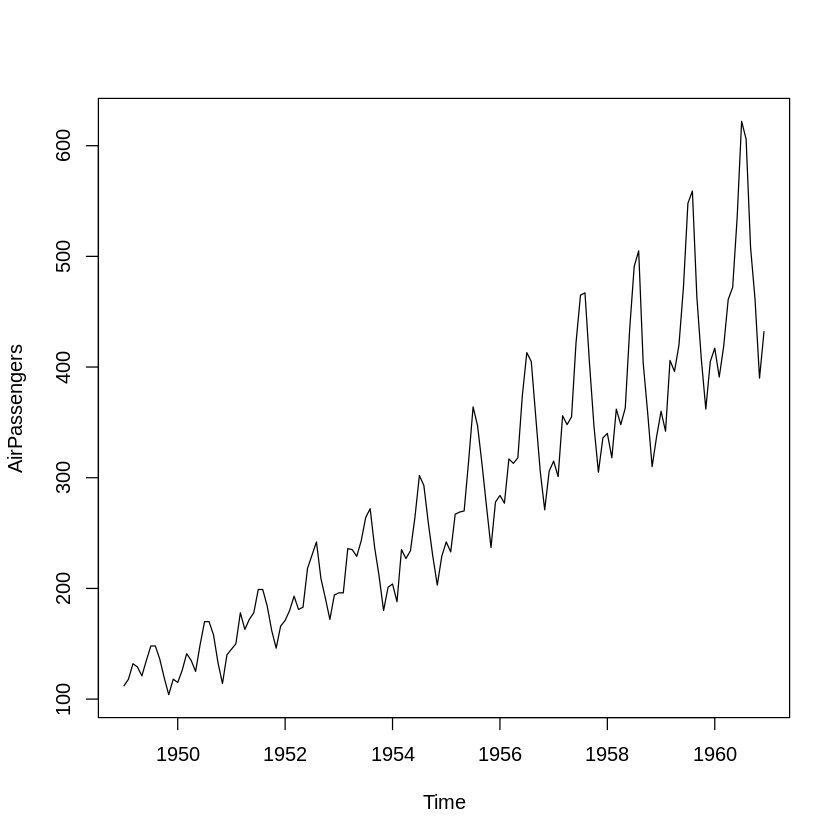

In [12]:
plot(AirPassengers)

In [3]:
my.figsize()

[1] "width: 7, height 7"

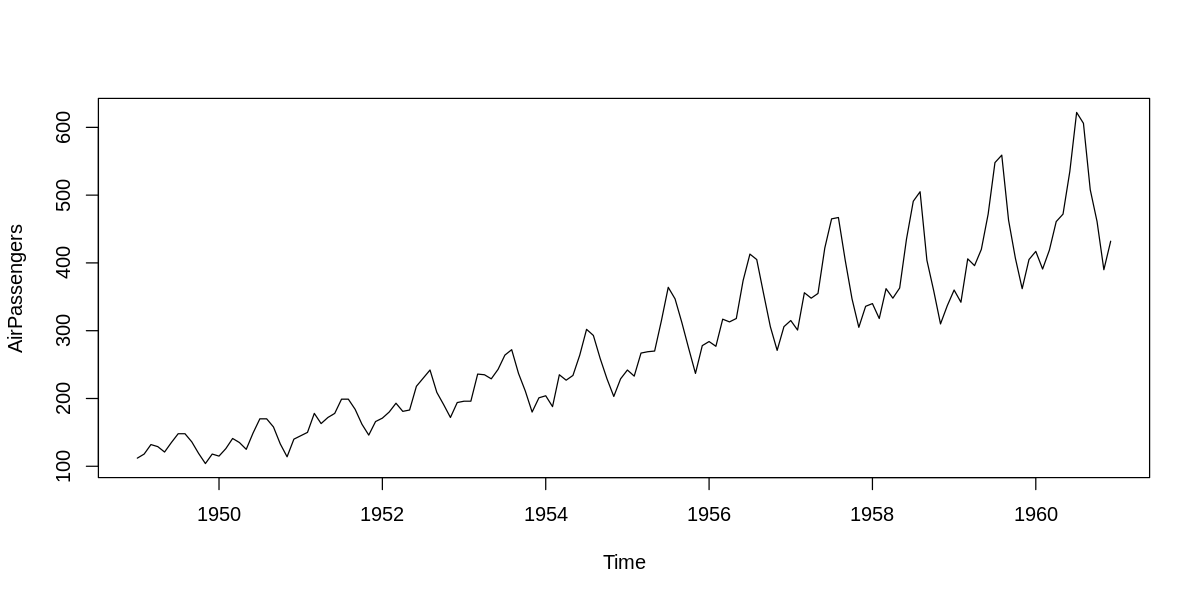

In [2]:
my.figsize(10,5)
plot(AirPassengers) 

# my.plot_forecast

In [56]:
#install.packages('forecast')
#install.packages('ggplot2')
library(forecast)
library(ggplot2)

In [4]:
attributes(AirPassengers)

$tsp
[1] 1949.000 1960.917   12.000

$class
[1] "ts"

In [16]:
start_train  <- c(1949, 1)
end_train  <- c(1955, 12)
start_test <- c(1956, 1)
end_test   <- c(1956, 12)

train <- window(AirPassengers, start=start_train, end=end_train)
test <- window(AirPassengers, start=start_test, end=end_test)

In [17]:
fit <- auto.arima(train, trace=FALSE)

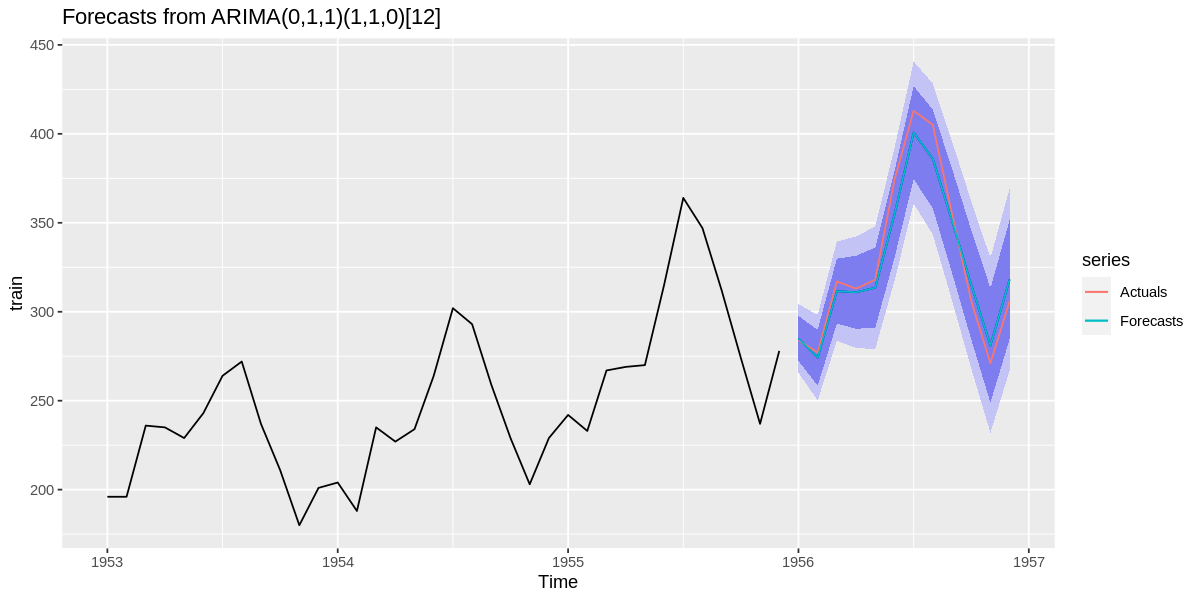

In [18]:
future <- length(test)
past <- 3*future

my.plot_forecast(fit, future, past, test=test)

# my.tsCV
modified from following:
- https://stats.stackexchange.com/questions/431545/why-isnt-the-tscv-function-allowing-for-step-size-other-than-1

In [2]:
library(forecast)
library(ggplot2)
library(gridExtra)

In [20]:
set.seed(5)

In [21]:
cv.forecast <- function(x, h) {
    forecast(auto.arima(x, trace=FALSE), h=h)
}

In [22]:
h <- 12
w <- 7*12
step <- 3

result <- my.tsCV(AirPassengers, cv.forecast, h=h, window=w, step=step)

[1] "5 % done."
[1] "10 % done."
[1] "15 % done."
[1] "20 % done."
[1] "25 % done."
[1] "30 % done."
[1] "35 % done."
[1] "40 % done."
[1] "45 % done."
[1] "50 % done."
[1] "55 % done."
[1] "60 % done."
[1] "65 % done."
[1] "70 % done."
[1] "75 % done."
[1] "80 % done."
[1] "85 % done."
[1] "90 % done."
[1] "95 % done."
[1] "100 % done."


In [23]:
my.figsize(10,5)

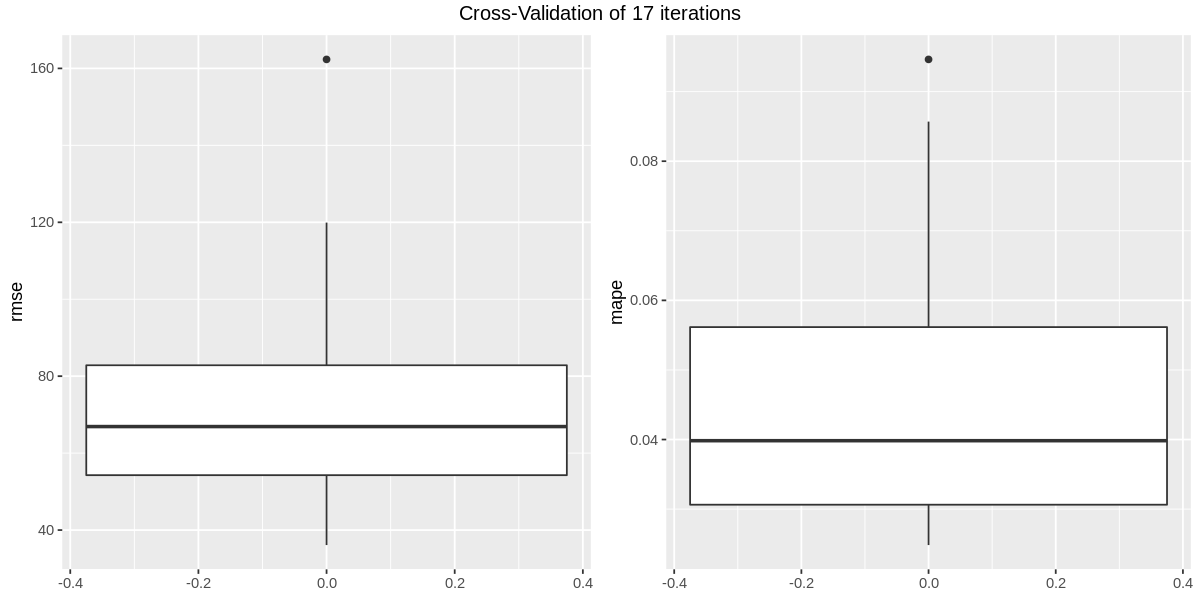

In [35]:
x <- result
x <- x[,c('rmse','mape')]
x <- as.data.frame(x)
x <- na.omit(x)

title <- paste('Cross-Validation of', nrow(x), 'iterations')
g1 <- ggplot(x, aes(y=rmse)) + geom_boxplot()
g2 <- ggplot(x, aes(y=mape)) + geom_boxplot()
grid.arrange(g1, g2, nrow=1, top=title)

# my.minmaxscale

In [45]:
library(xts)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [37]:
start_train  <- c(1949, 1)
end_train  <- c(1955, 12)
start_test <- c(1956, 1)
end_test   <- c(1956, 12)

train <- window(AirPassengers, start=start_train, end=end_train)
test <- window(AirPassengers, start=start_test, end=end_test)

In [206]:
getdate <- function(x) {
    y <- as.integer(x)
    m <- round((x - y) * 12 + 1)
    d <- as.yearmon(paste(y, m, sep='-'), "%Y-%m")
    d <- format(d, "%Y-%m-%d")
    d <- as.Date(d)
    return(d)
}

tsp <- attr(train, 'tsp')
order.by <- seq(getdate(tsp[1]), getdate(tsp[2]), by="month")
train.s <- xts(train, order.by=order.by)

train.scaled <- my.minmaxscale(train.s)
train.inv <- my.minmaxscale(train.scaled)

In [205]:
order.by

[1] "1949-01-01" "1949-02-01" "1949-03-01" "1949-04-01" "1949-05-01"
 [6] "1949-06-01" "1949-07-01" "1949-08-01" "1949-09-01" "1949-10-01"
[11] "1949-11-01" "1949-12-01" "1950-01-01" "1950-02-01" "1950-03-01"
[16] "1950-04-01" "1950-05-01" "1950-06-01" "1950-07-01" "1950-08-01"
[21] "1950-09-01" "1950-10-01" "1950-11-01" "1950-12-01" "1951-01-01"
[26] "1951-02-01" "1951-03-01" "1951-04-01" "1951-05-01" "1951-06-01"
[31] "1951-07-01" "1951-08-01" "1951-09-01" "1951-10-01" "1951-11-01"
[36] "1951-12-01" "1952-01-01" "1952-02-01" "1952-03-01" "1952-04-01"
[41] "1952-05-01" "1952-06-01" "1952-07-01" "1952-08-01" "1952-09-01"
[46] "1952-10-01" "1952-11-01" "1952-12-01" "1953-01-01" "1953-02-01"
[51] "1953-03-01" "1953-04-01" "1953-05-01" "1953-06-01" "1953-07-01"
[56] "1953-08-01" "1953-09-01" "1953-10-01" "1953-11-01" "1953-12-01"
[61] "1954-01-01" "1954-02-01" "1954-03-01" "1954-04-01" "1954-05-01"
[66] "1954-06-01" "1954-07-01" "1954-08-01" "1954-09-01" "1954-10-01"
[71] "1954-11-01" "1954-12-01" "1955-01-01" "1955-02-01" "1955-03-01"
[76] "1955-04-01" "1955-05-01" "1955-06-01" "1955-07-01" "1955-08-01"
[81] "1955-09-01" "1955-10-01" "1955-11-01" "1955-12-01"

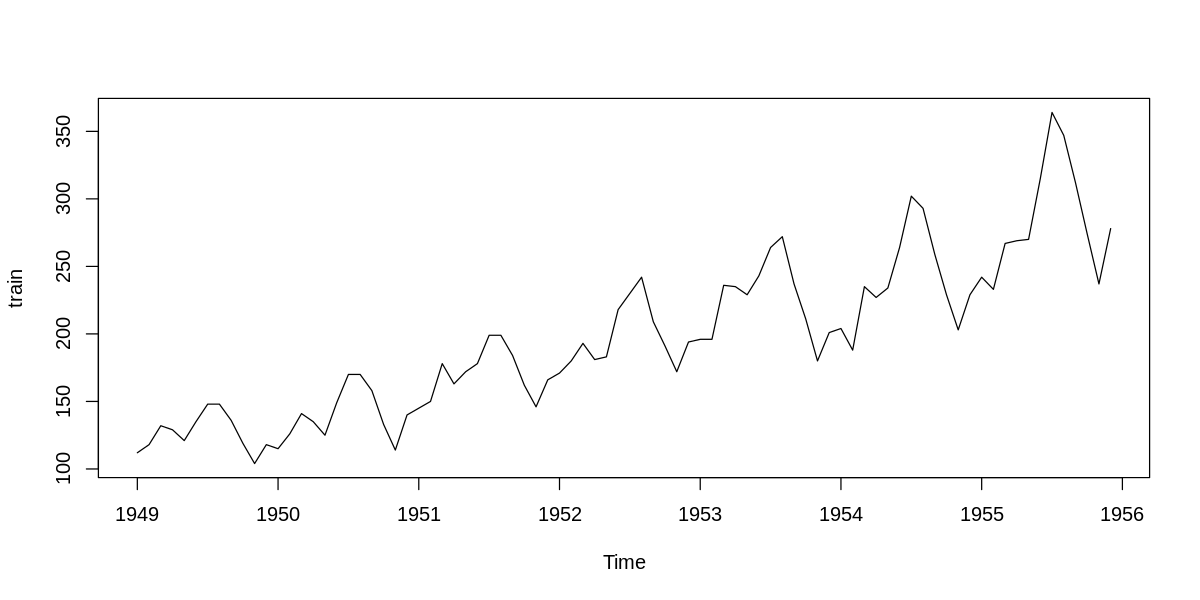

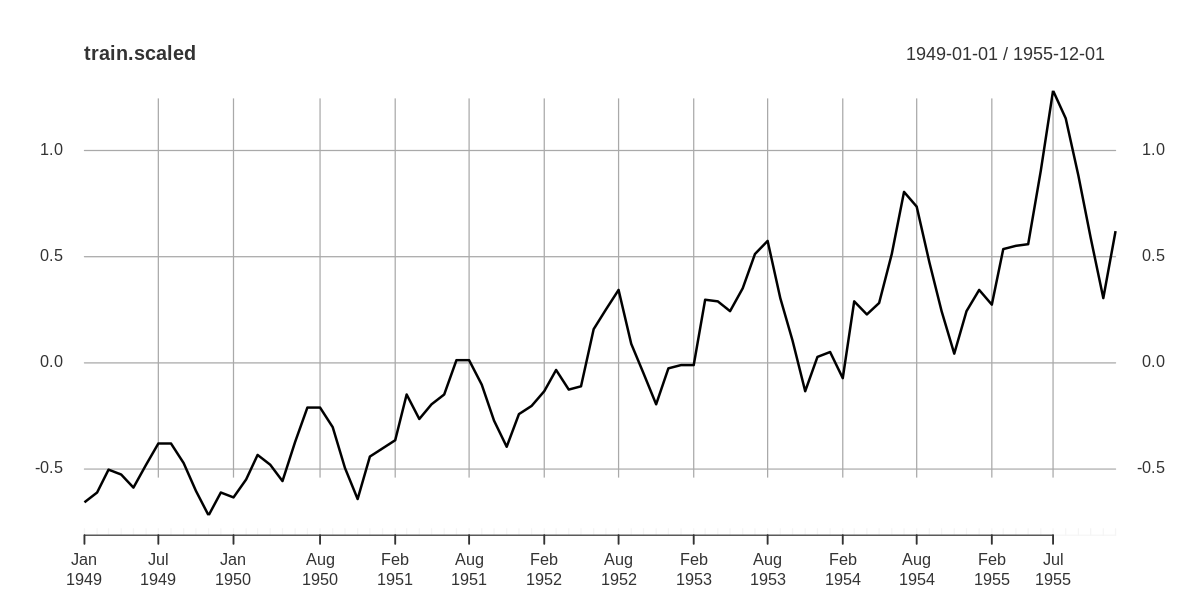

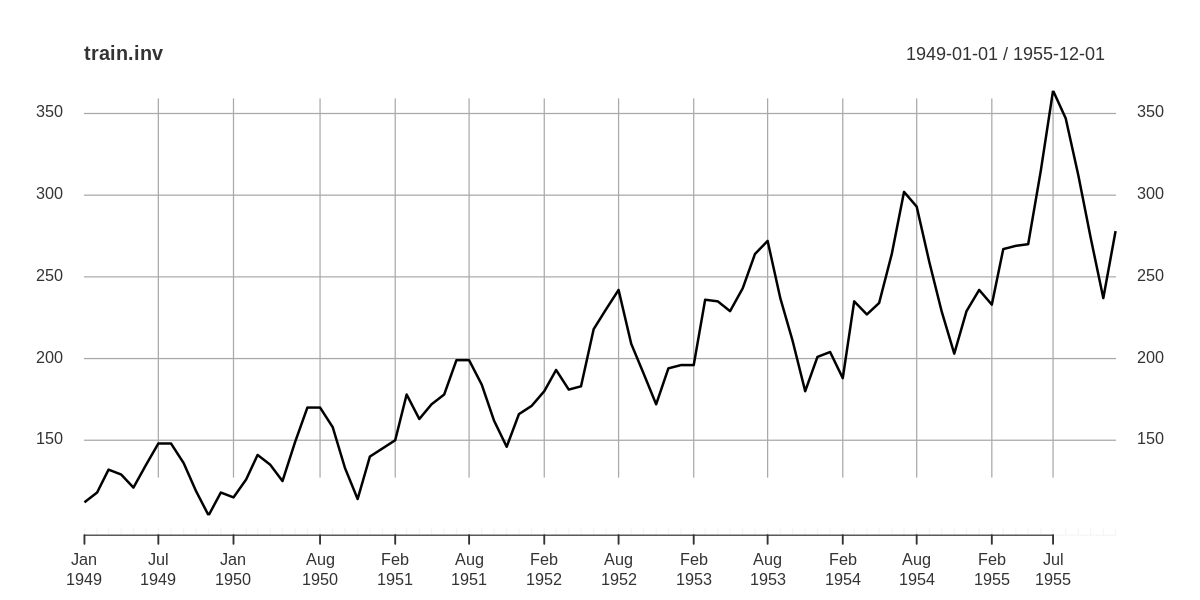

In [207]:
plot(train)
plot(train.scaled)
plot(train.inv)

In [195]:
str(as.ts(train.inv))


 Time-Series [1:84] from 1 to 149401: 112 118 132 129 121 135 148 148 136 119 ...


In [176]:
str(train)
str(train.s)

 Time-Series [1:84] from 1949 to 1956: 112 118 132 129 121 135 148 148 136 119 ...
An ‘xts’ object on 1949-01-01/1955-12-01 containing:
  Data: num [1:84, 1] -0.657 -0.61 -0.503 -0.526 -0.587 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : NULL
  Indexed by objects of class: [POSIXct,POSIXt] TZ: 
  Original class: 'double'  
  xts Attributes:  
List of 2
 $ scaled:center: Named num 197
  ..- attr(*, "names")= chr "X"
 $ scaled:scale : Named num 130
  ..- attr(*, "names")= chr "X"


In [182]:
(max(train) - attr(train.s, 'scaled:center')) / attr(train.s, 'scaled:scale')

X 
1.28196

In [48]:
train.s <- as.xts(train)


train1n <- my.minmaxscale(as.xts(train))
head(train1n)

ERROR: Error in as.POSIXlt.character(x, tz, ...): character string is not in a standard unambiguous format


In [54]:
start(train)[1]

[1] 1949

In [68]:
p <- paste(start(train), seq_along(train))
as.Date(p, "%Y %j")

[1] "1949-01-01" "1-01-02"    "1949-01-03" "1-01-04"    "1949-01-05"
 [6] "1-01-06"    "1949-01-07" "1-01-08"    "1949-01-09" "1-01-10"   
[11] "1949-01-11" "1-01-12"    "1949-01-13" "1-01-14"    "1949-01-15"
[16] "1-01-16"    "1949-01-17" "1-01-18"    "1949-01-19" "1-01-20"   
[21] "1949-01-21" "1-01-22"    "1949-01-23" "1-01-24"    "1949-01-25"
[26] "1-01-26"    "1949-01-27" "1-01-28"    "1949-01-29" "1-01-30"   
[31] "1949-01-31" "1-02-01"    "1949-02-02" "1-02-03"    "1949-02-04"
[36] "1-02-05"    "1949-02-06" "1-02-07"    "1949-02-08" "1-02-09"   
[41] "1949-02-10" "1-02-11"    "1949-02-12" "1-02-13"    "1949-02-14"
[46] "1-02-15"    "1949-02-16" "1-02-17"    "1949-02-18" "1-02-19"   
[51] "1949-02-20" "1-02-21"    "1949-02-22" "1-02-23"    "1949-02-24"
[56] "1-02-25"    "1949-02-26" "1-02-27"    "1949-02-28" "1-03-01"   
[61] "1949-03-02" "1-03-03"    "1949-03-04" "1-03-05"    "1949-03-06"
[66] "1-03-07"    "1949-03-08" "1-03-09"    "1949-03-10" "1-03-11"   
[71] "1949-03-12" "1-03-13"    "1949-03-14" "1-03-15"    "1949-03-16"
[76] "1-03-17"    "1949-03-18" "1-03-19"    "1949-03-20" "1-03-21"   
[81] "1949-03-22" "1-03-23"    "1949-03-24" "1-03-25"

ERROR: Error in seq.default(start(train), by = 12): 'from' must be of length 1


In [74]:
train$tsp

ERROR: Error in train$tsp: $ operator is invalid for atomic vectors


In [79]:
attributes(train)
attr(train, 'tsp')

$tsp
[1] 1949.000 1955.917   12.000

$class
[1] "ts"

[1] 1949.000 1955.917   12.000

In [83]:
tsp <- attr(train, 'tsp')

In [86]:
seq(as.Date(tsp[1]), as.Date(tsp[2]), by=tsp[3])

[1] "1975-05-04"

In [106]:
seq(1,10,2)
tsp[1]
tsp[2]
#as.Date(as.character(tsp[1]), "%Y")
x <- as.yearmon(as.character(tsp[1]), "%Y")
x-5
x
format(x, "%Y-%m-%d")

[1] 1 3 5 7 9

[1] 1949

[1] 1955.917

[1] "Sep 1944"

[1] "Sep 1949"

[1] "1949-09-01"

In [119]:
x <- as.yearmon(paste(round(tsp[1]), 1, sep='-'), "%Y-%m")
format(x, "%Y-%m-%d")

x <- as.yearmon(paste(round(tsp[2]), 1, sep='-'), "%Y-%m")
format(x, "%Y-%m-%d")

[1] "1949-01-01"

[1] "1956-01-01"

In [124]:
seq(as.Date('1949-01-01'), as.Date('1956-01-01'), by ='month')

[1] "1949-01-01" "1949-02-01" "1949-03-01" "1949-04-01" "1949-05-01"
 [6] "1949-06-01" "1949-07-01" "1949-08-01" "1949-09-01" "1949-10-01"
[11] "1949-11-01" "1949-12-01" "1950-01-01" "1950-02-01" "1950-03-01"
[16] "1950-04-01" "1950-05-01" "1950-06-01" "1950-07-01" "1950-08-01"
[21] "1950-09-01" "1950-10-01" "1950-11-01" "1950-12-01" "1951-01-01"
[26] "1951-02-01" "1951-03-01" "1951-04-01" "1951-05-01" "1951-06-01"
[31] "1951-07-01" "1951-08-01" "1951-09-01" "1951-10-01" "1951-11-01"
[36] "1951-12-01" "1952-01-01" "1952-02-01" "1952-03-01" "1952-04-01"
[41] "1952-05-01" "1952-06-01" "1952-07-01" "1952-08-01" "1952-09-01"
[46] "1952-10-01" "1952-11-01" "1952-12-01" "1953-01-01" "1953-02-01"
[51] "1953-03-01" "1953-04-01" "1953-05-01" "1953-06-01" "1953-07-01"
[56] "1953-08-01" "1953-09-01" "1953-10-01" "1953-11-01" "1953-12-01"
[61] "1954-01-01" "1954-02-01" "1954-03-01" "1954-04-01" "1954-05-01"
[66] "1954-06-01" "1954-07-01" "1954-08-01" "1954-09-01" "1954-10-01"
[71] "1954-11-01" "1954-12-01" "1955-01-01" "1955-02-01" "1955-03-01"
[76] "1955-04-01" "1955-05-01" "1955-06-01" "1955-07-01" "1955-08-01"
[81] "1955-09-01" "1955-10-01" "1955-11-01" "1955-12-01" "1956-01-01"

In [131]:
as.yearmon('1955.9', "%Y")

[1] "Sep 1955"

In [132]:
tsp

[1] 1949.000 1955.917   12.000

In [157]:
#10/12*11
#as.integer(10/12*11)
#.9166666666 * 12
time(train)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,1949.000,1949.083,1949.167,1949.250,1949.333,1949.417,1949.500,1949.583,1949.667,1949.750,1949.833,1949.917
1950,1950.000,1950.083,1950.167,1950.250,1950.333,1950.417,1950.500,1950.583,1950.667,1950.750,1950.833,1950.917
1951,1951.000,1951.083,1951.167,1951.250,1951.333,1951.417,1951.500,1951.583,1951.667,1951.750,1951.833,1951.917
1952,1952.000,1952.083,1952.167,1952.250,1952.333,1952.417,1952.500,1952.583,1952.667,1952.750,1952.833,1952.917
1953,1953.000,1953.083,1953.167,1953.250,1953.333,1953.417,1953.500,1953.583,1953.667,1953.750,1953.833,1953.917
1954,1954.000,1954.083,1954.167,1954.250,1954.333,1954.417,1954.500,1954.583,1954.667,1954.750,1954.833,1954.917
1955,1955.000,1955.083,1955.167,1955.250,1955.333,1955.417,1955.500,1955.583,1955.667,1955.750,1955.833,1955.917


In [163]:
getdate <- function(x) {
    y <- as.integer(x)
    m <- round((x - y) * 12 + 1)
    d <- as.yearmon(paste(y, m, sep='-'), "%Y-%m")
    return(format(d, "%Y-%m-%d"))
}

getdate(1949)
getdate(1950.083)
getdate(1955.917)

[1] "1949-01-01"

[1] "1950-02-01"

[1] "1955-12-01"

In [172]:
getdate <- function(x) {
    y <- as.integer(x)
    m <- round((x - y) * 12 + 1)
    d <- as.yearmon(paste(y, m, sep='-'), "%Y-%m")
    d <- format(d, "%Y-%m-%d")
    d <- as.Date(d)
    return(d)
}

tsp <- attr(train, 'tsp')
order.by <- seq(getdate(tsp[1]), getdate(tsp[2]), by="month")
xts(train, order.by=order.by)
#xts(train, order.by=)

           [,1]
1949-01-01  112
1949-02-01  118
1949-03-01  132
1949-04-01  129
1949-05-01  121
1949-06-01  135
1949-07-01  148
1949-08-01  148
1949-09-01  136
1949-10-01  119
1949-11-01  104
1949-12-01  118
1950-01-01  115
1950-02-01  126
1950-03-01  141
1950-04-01  135
1950-05-01  125
1950-06-01  149
1950-07-01  170
1950-08-01  170
1950-09-01  158
1950-10-01  133
1950-11-01  114
1950-12-01  140
1951-01-01  145
1951-02-01  150
1951-03-01  178
1951-04-01  163
1951-05-01  172
1951-06-01  178
1951-07-01  199
1951-08-01  199
1951-09-01  184
1951-10-01  162
1951-11-01  146
1951-12-01  166
1952-01-01  171
1952-02-01  180
1952-03-01  193
1952-04-01  181
1952-05-01  183
1952-06-01  218
1952-07-01  230
1952-08-01  242
1952-09-01  209
1952-10-01  191
1952-11-01  172
1952-12-01  194
1953-01-01  196
1953-02-01  196
1953-03-01  236
1953-04-01  235
1953-05-01  229
1953-06-01  243
1953-07-01  264
1953-08-01  272
1953-09-01  237
1953-10-01  211
1953-11-01  180
1953-12-01  201
1954-01-01  204
1954-02-

In [169]:
getdate(tsp[1])
getdate(tsp[2])

[1] "1949-01-01"

[1] "1955-12-01"

In [ ]:
tsp <- attr(train, 'tsp')
xts(train, )